In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy import linalg
import numpy as np

In [2]:
def lerp( a, b, t ):
    return (1 - t) * a + t * b

In [3]:
x, y = make_blobs( n_samples=10, centers=3, n_features=3, cluster_std=0.2 )
x, y, x[:, 0]

(array([[-1.64187552, -4.09458221,  8.66433261],
        [-2.92733436,  2.51069843,  4.22398708],
        [-7.75813418,  4.37496326, -0.04623485],
        [-2.63447255,  2.60889528,  4.20199001],
        [-7.54764044,  5.15725715, -0.46490931],
        [-7.23480859,  4.74758574, -0.40457259],
        [-2.56040353,  2.40943434,  4.13869488],
        [-1.97373003, -4.25394921,  8.76061993],
        [-7.76123612,  4.7274685 , -0.29176318],
        [-1.86371557, -3.93441149,  8.78534714]]),
 array([2, 1, 0, 1, 0, 0, 1, 2, 0, 2]),
 array([-1.64187552, -2.92733436, -7.75813418, -2.63447255, -7.54764044,
        -7.23480859, -2.56040353, -1.97373003, -7.76123612, -1.86371557]))

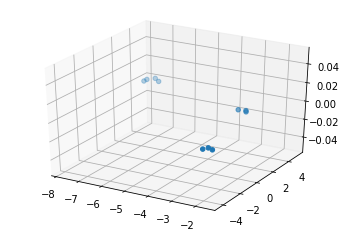

In [4]:
fig = plt.figure()
ax = fig.add_subplot( 111, projection='3d' )

x_vals = x[:, 0]
y_vals = x[:, 1]
z_vals = x[:, 2]

ax.scatter( x_vals, y_vals )
plt.show()

In [5]:
df = pd.DataFrame( x )
smm = np.array( squareform( pdist( df ) ) )
smm

array([[ 0.        ,  8.06218365, 13.60205154,  8.11383761, 14.27647187,
        13.84593355,  7.97667361,  0.38052135, 13.98165959,  0.29918586],
       [ 8.06218365,  0.        ,  6.71169916,  0.30966843,  7.09487496,
         6.70682963,  0.39008642,  8.20066196,  6.97658056,  7.96722866],
       [13.60205154,  6.71169916,  0.        ,  6.88609608,  0.91190989,
         0.73561071,  6.95653252, 13.61903642,  0.42959717, 13.48283057],
       [ 8.11383761,  0.30966843,  6.88609608,  0.        ,  7.23970416,
         6.85255482,  0.22198459,  8.26536883,  7.1390388 ,  8.02596364],
       [14.27647187,  7.09487496,  0.91190989,  7.23970416,  0.        ,
         0.5189749 ,  7.32231068, 14.30907657,  0.5102166 , 14.16095637],
       [13.84593355,  6.70682963,  0.73561071,  6.85255482,  0.5189749 ,
         0.        ,  6.9251927 , 13.88190668,  0.53875468, 13.73609628],
       [ 7.97667361,  0.39008642,  6.95653252,  0.22198459,  7.32231068,
         6.9251927 ,  0.        ,  8.13062466

In [6]:
w, v = np.linalg.eig( np.array( smm ) )
w, v

(array([ 67.07926318, -46.90574129, -17.06976162,  -0.97467566,
         -0.52773239,  -0.20931227,  -0.40325588,  -0.38330352,
         -0.29228241,  -0.31319814]),
 array([[ 3.61275544e-01,  4.12197606e-01, -1.80890785e-01,
         -1.33557746e-02,  1.61392456e-02,  6.63000709e-03,
         -1.93137032e-01,  5.52684195e-01, -5.68857458e-01,
         -2.87912316e-03],
        [ 2.62631987e-01, -6.80710352e-03,  5.05453480e-01,
          3.12322928e-02, -1.29427760e-02, -2.03993431e-01,
          7.60317384e-01,  2.28703190e-01, -3.84343003e-02,
          2.95587894e-02],
        [ 3.09988336e-01, -3.40053651e-01, -1.59046162e-01,
          7.28157554e-01,  3.88069306e-02,  6.35343093e-03,
         -1.46611188e-02,  4.10161906e-03, -3.48520374e-03,
         -4.80594818e-01],
        [ 2.65845692e-01, -3.62701248e-03,  5.18707204e-01,
         -1.46127980e-02, -1.45009090e-02,  7.82942142e-01,
         -2.05172120e-01, -6.70152554e-02,  1.48959140e-02,
         -5.00102502e-03],
      

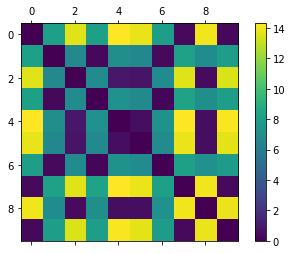

In [7]:
fig = plt.figure()
ax = fig.add_subplot( 111 )

c_ax = ax.matshow( smm, interpolation='nearest' )
fig.colorbar( c_ax )

plt.show()

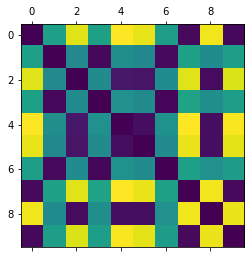

In [8]:
smm_deconp = v @ np.diag( w ) @ np.linalg.inv(v)

plt.matshow( smm_deconp )
plt.show()

In [9]:
Eigenvalues, Eigenvectors = np.linalg.eigh( np.array(smm) )

Lambda = np.diag(Eigenvalues)


Eigenvectors @ Lambda @ np.linalg.inv(Eigenvectors)

array([[ 5.95595020e-16,  8.06218365e+00,  1.36020515e+01,
         8.11383761e+00,  1.42764719e+01,  1.38459336e+01,
         7.97667361e+00,  3.80521352e-01,  1.39816596e+01,
         2.99185862e-01],
       [ 8.06218365e+00,  2.00897923e-15,  6.71169916e+00,
         3.09668428e-01,  7.09487496e+00,  6.70682963e+00,
         3.90086416e-01,  8.20066196e+00,  6.97658056e+00,
         7.96722866e+00],
       [ 1.36020515e+01,  6.71169916e+00,  4.38571365e-15,
         6.88609608e+00,  9.11909885e-01,  7.35610706e-01,
         6.95653252e+00,  1.36190364e+01,  4.29597169e-01,
         1.34828306e+01],
       [ 8.11383761e+00,  3.09668428e-01,  6.88609608e+00,
         3.69086396e-15,  7.23970416e+00,  6.85255482e+00,
         2.21984590e-01,  8.26536883e+00,  7.13903880e+00,
         8.02596364e+00],
       [ 1.42764719e+01,  7.09487496e+00,  9.11909885e-01,
         7.23970416e+00,  4.89005546e-15,  5.18974901e-01,
         7.32231068e+00,  1.43090766e+01,  5.10216596e-01,
         1.